In [1]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Reading level distributions

In [2]:
import cloudpickle
disease_list = cloudpickle.load(open("pickles/disease_list.pkl", "rb" ) )
forum_db = cloudpickle.load(open("pickles/cleaned_forum_data.pkl", "rb" ) )

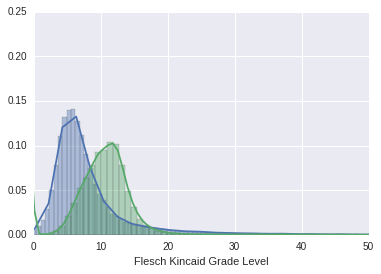

In [4]:
sns.distplot(forum_db['askergrd'],400)
sns.distplot(forum_db['doctorgrd'],100)
plt.xlim(0, 50)
plt.xlabel('Flesch Kincaid Grade Level')

KeyboardInterrupt: 

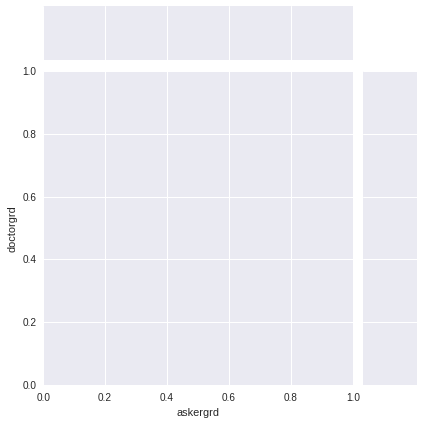

In [5]:
g = sns.jointplot(x='askergrd', y='doctorgrd', data=forum_db, kind="kde", color="m")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)

# Most frequently mentioned conditions

In [3]:
disease_db = cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

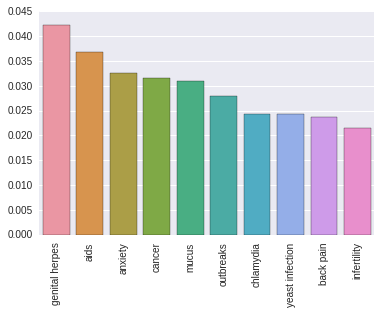

In [5]:
counts = [(a['name'],a['forum_freq']) for a in sorted(disease_db, key=lambda x: -x['forum_freq'])]

sns.barplot(x=[name for name,_ in counts][1:11], y=[count/len(forum_db) for _,count in counts][1:11])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

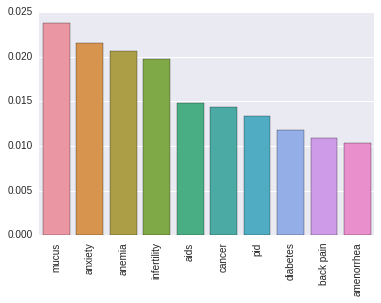

In [7]:
counts = [(a['name'],a['doctor_freq']) for a in sorted(disease_db, key=lambda x: -x['doctor_freq'])]

sns.barplot(x=[name for name,_ in counts][1:11], y=[count/len(forum_db) for _,count in counts][1:11])
plt.xticks(rotation=90)

In [21]:
from tabulate import tabulate
topdoc = [a['name'] for a in sorted(disease_db, key=lambda x: -x['doctor_freq'])]
topfor = [a['name'] for a in sorted(disease_db, key=lambda x: -x['forum_freq'])]
topclin = [a['name'] for a in sorted(disease_db, key=lambda x: -x['clin_freq'])]
topwiki = [a['name'] for a in sorted(disease_db, key=lambda x: -x['wiki_freq'])]
topshow=10
print tabulate(zip(topdoc[:topshow],topfor[:topshow],topclin[:topshow],topwiki[:topshow]),headers=('most frequent doctor','most frequent user','most frequent clinical','most frequent wiki'))

most frequent doctor    most frequent user    most frequent clinical    most frequent wiki
----------------------  --------------------  ------------------------  --------------------
pregnancy               pregnancy             chlamydia                 pneumonia
mucus                   genital herpes        gonorrhea                 cancer
anxiety                 aids                  syphilis                  tinea
anemia                  anxiety               flu                       psoriasis
infertility             cancer                gerd                      scabies
aids                    mucus                 acne                      syphilis
cancer                  outbreaks             aids                      arthritis
pid                     chlamydia             adenomyosis               chlamydia
diabetes                yeast infection       cancer                    pregnancy
back pain               back pain             allergies                 flu


# Lag time time between question and answer

In [5]:
list_=[]
df = pd.read_csv('forumdata/doctorslounge_data.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/ehealthforum_data_0.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/ehealthforum_data_1.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/ehealthforum_data_2.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/ehealthforum_data_3.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/ehealthforum_data_4.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/ehealthforum_data_5.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/webmd_data_0.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/webmd_data_1.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/webmd_data_2.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('forumdata/scarleteen_data.csv', index_col=None, header=0)
list_.append(df)

df=pd.concat(list_,ignore_index=True)
df=df.drop([df.columns[0]],1)
df=df.drop_duplicates()

In [6]:
#just lists to turn into a new dataframe (this is quicker than append)
# sure I could figure out a groupby post then sortby response_type

df=df.loc[df['response_time']!='ignored',:]
df=df.loc[df['response_time']!='ignore',:]
df['response_time']=df['response_time'].str.replace('replied ','').str.strip()
df['response_time']=pd.to_datetime(df['response_time'])

timing=[]

for i,post in enumerate(df['post'].unique()):
    if(i%1000==0):
        print i
    tm_ask = df.loc[(df['post']==post) & (df['response_type']=='asker'),'response_time'].values
    tm_doc = df.loc[(df['post']==post) & (df['response_type']=='doctor'),'response_time'].values
    if(len(tm_ask)>0 and len(tm_doc)>0):
        x=(tm_doc[0]-tm_ask[0])
        days = x.astype('timedelta64[D]')
        timing.append(days / np.timedelta64(1, 'D'))
delays=np.array(timing)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000


In [7]:
print "The mean time for a doctor response on the health forums was %s days." % delays.mean()

The mean time for a doctor response on the health forums was 4.51026295087 days.


(0, 50)

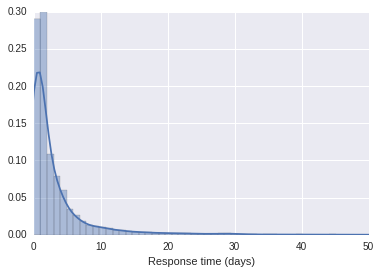

In [26]:
sns.distplot(delays[ (delays<50)],50,kde_kws={'bw':1})
plt.xlabel('Response time (days)')
plt.xlim([0,50])

# some bad answers

In [19]:
forum_db.sort_values('doctorgrd')[['doctortxt','doctorgrd']][20000:25510]

,doctortxt,doctorgrd
22860,"Hello, Welcome to the ehealthforum and I am r...",7.2592
29150,"Hi, and thanks for your query on eHealth foru...",7.2595
4625,"Dear Jhall4, It sounds like you could have an ...",7.2599
13381,"Welcome to e health forum. In your case, exce...",7.2604
47381,"Hi, and thanks for your medical question on e...",7.2611
38132,"Hi, Welcome to the ehealthforum. I am glad to...",7.2618
2954,"Hi yeah4me07, In some women after taking birth...",7.2620
1162,"Hello,I'm sorry I can't answer this. I see no ...",7.2620
6169,The only way to abolish your fear or nervousne...,7.2620
36699,"Hi, Welcome to the ehealthforum. I am glad to...",7.2620


In [21]:
forum_db.loc[1162,'askertxt']

'after having intercoarse while cleaning up I noticed steam coming from my vaginia Is this normal or what does it mean when this happens'

In [22]:
forum_db.loc[1162,'doctortxt']

"Hello,I'm sorry I can't answer this. I see no reason for something like this to occur; I can only guess it is some body heat escaping but it is not something I have encountered before. If it continues to bother you, discuss it with a health care provider. Best wishes"

In [23]:
forum_db.loc[1162,'post']

'http://www.doctorslounge.com/forums/viewtopic.php?f=73&t=23501&sid=f1b1695ee6571db608ff06ca513fa82c'